# Chapter 3 - Exercises

## 1.

$\displaystyle{\mu = \frac{1}{n} \sum_{i=1}^n x_i}$

$\displaystyle{\sigma = \sqrt{\frac{\sum_{i=1}^n (x_i - \mu)^{2}}{n}}}$

In [1]:
import math

measurements = [1.78, 1.75, 1.72, 1.74, 1.77]

mean = sum(measurements)/len(measurements)
print(f"Mean: {mean}")

stddev = math.sqrt(sum([(i-mean)**2 for i in measurements])/len(measurements))
print(f"Standard deviation: {stddev}")

Mean: 1.752
Standard deviation: 0.02135415650406264


## 2.

Probability to last between 20 and 30 months: p = 0.06382743803380352


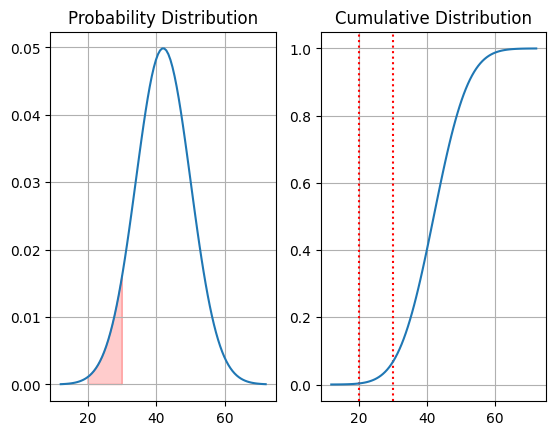

In [2]:
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

mean = 42
stddev = 8
range = [20, 30]

prob = stats.norm.cdf(range[1], mean, stddev) - stats.norm.cdf(range[0], mean, stddev)
print(f"Probability to last between {range[0]} and {range[1]} months: p = {prob}")

ax = plt.subplot(1, 2, 1)
x = np.linspace(mean-30, mean+30, 100)
ax.grid(True, which="both")

ix = np.linspace(range[0], range[1])
iy = stats.norm.pdf(ix, mean, stddev)
verts = [(range[0], 0), *zip(ix, iy), (range[1], 0)]
poly = Polygon(verts, facecolor='#ff000033', edgecolor='#ff000055')
ax.add_patch(poly)

plt.title("Probability Distribution")
plt.plot(x, stats.norm.pdf(x, mean, stddev))

plt.subplot(1, 2, 2)
plt.grid(True, which="both")
plt.axvline(x = range[0], color = 'r', linestyle = ':')
plt.axvline(x = range[1], color = 'r', linestyle = ':')

plt.title("Cumulative Distribution")
plt.plot(x, stats.norm.cdf(x, mean, stddev))

plt.show()


## 3.

Confidence interval of 99.0%: [1.7026658973748656, 1.7285101026251342]


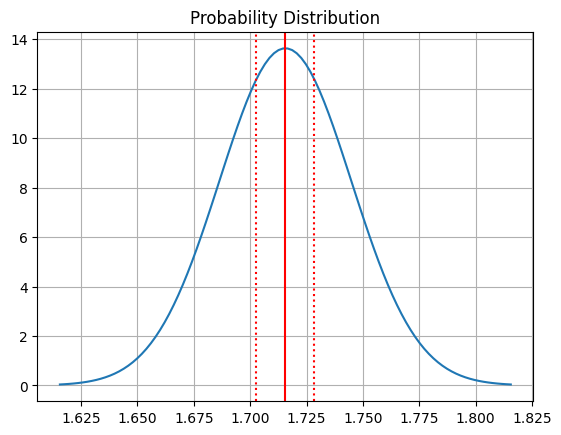

In [3]:
samples = 34
mean = 1.715588
stddev = 0.029252

confidence = 0.99

bound = stats.norm.ppf(confidence + (1-confidence)/2)
offset = bound * (stddev/math.sqrt(samples))

print(f"Confidence interval of {confidence*100}%: [{mean-offset}, {mean+offset}]")

x = np.linspace(mean-0.1, mean+0.1, 100)
plt.grid(True, which="both")
plt.plot(x, stats.norm.pdf(x, mean, stddev))

plt.axvline(x = mean-offset, color = 'r', linestyle = ':')
plt.axvline(x = mean, color = 'r', linestyle = '-')
plt.axvline(x = mean+offset, color = 'r', linestyle = ':')

plt.title("Probability Distribution")

plt.show()



## 4.

Assuming a new mean outside the 95% expectancy range to be statistically relevant, the change indeed did affect sales


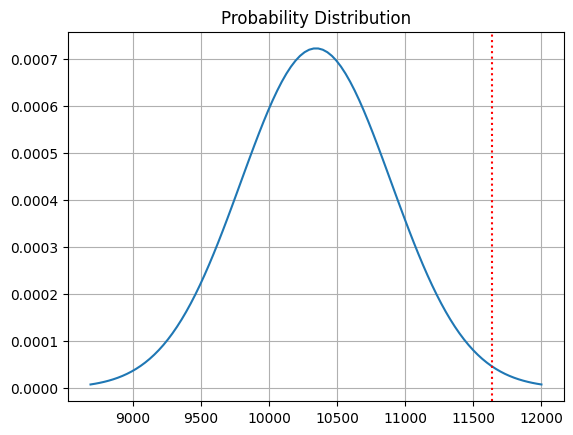

In [4]:
mean = 10345
stddev = 552

test_mean = 11641
relevance = 0.05

lower = stats.norm.ppf(relevance/2, mean, stddev)
upper = stats.norm.ppf(1-relevance/2, mean, stddev)

print(f"Assuming a new mean outside the {(1-relevance)*100:.0f}% expectancy range to be statistically relevant, the change ", end="")
if test_mean < lower or test_mean > upper:
    print(f"indeed did affect sales")
else:
    print(f"did not affect sales")

x = np.linspace(mean-stddev*3, mean+stddev*3, 100)
plt.grid(True, which="both")
plt.plot(x, stats.norm.pdf(x, mean, stddev))

plt.axvline(x = test_mean, color = 'r', linestyle = ':')

plt.title("Probability Distribution")

plt.show()
